<a href="https://colab.research.google.com/github/DevThiagoSc/Analise_Venda_Imoveis/blob/main/Venda_de_imoveis_seattle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***
# Análise de Vendas de Imóveis na Cidade de Seattle
***

### A ideia deste projeto é praticar e demonstrar minhas habilidades sobre análise exploratória de dados e geração de insights. Para isso, desenvolvi um projeto para uma empresa ficticia de compra e vendas de imóveis com o intuito de otimizar seus negócios. Através da base de dados de vendas anteriores da empresa, verifiquei quais as características mais presentes nos imóveis vendidos e estipulei quais reformas e manutenções poderiam ser feitas nos imóveis para valorizá-los. 

##Importando bibliotecas e lendo dados

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

In [2]:
df = pd.read_csv('kc_houses_data_seattle.csv', sep=',')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,neighborhood,city
0,9212900260,20140527T000000,468000.0,2,1.00,1160,6000,1.0,0,0,...,300,1942,0,98115,47.6900,-122.292,1330,6000,Wedgwood,Seattle
1,5101402488,20140624T000000,438000.0,3,1.75,1520,6380,1.0,0,0,...,730,1948,0,98115,47.6950,-122.304,1520,6235,Wedgwood,Seattle
2,461000390,20140624T000000,687500.0,4,1.75,2330,5000,1.5,0,0,...,820,1929,0,98117,47.6823,-122.368,1460,5000,Whittier Heights,Seattle
3,7589200193,20141110T000000,535000.0,3,1.00,1090,3000,1.5,0,0,...,0,1929,0,98117,47.6889,-122.375,1570,5080,Whittier Heights,Seattle
4,5200100125,20141027T000000,555000.0,3,2.00,1980,3478,1.5,0,0,...,540,1929,0,98117,47.6775,-122.372,1610,3478,Whittier Heights,Seattle


#### Base de dados utilizada: https://www.kaggle.com/datasets/harlfoxem/housesalesprediction
Dicionário de dados:
<p>id - Identificador de cada venda</p>
<p>date - Data da venda
<p>price - Preço que imóvel foi vendido
<p>bedrooms - Número de quartos
<p>bathrooms - Número de banheiros (banheiros com casas decimais, são banheiros que não possuem chuveiros)
<p>sqft_living - Área util do imóvel
<p>sqft_lot - Área total do terreno
<p>floors - Andares
<p>waterfront - Indicador se imóvel tem vista para o mar
<p>view - Índice de 0 a 4 para a qualidade da vista
<p>condition - Índice de 1 a 5 indicando condição do imóvel
<p>grade - Índice de 1 a 13 indicando a qualidade dos materiais da construção e design da obra
<p>sqft_above - Área interna do imóvel a partir do primeiro andar
<p>sqft_basement - Área do porão
<p>yr_built - Ano em que imóvel foi construído
<p>yr_renovated - Ano em que imóvel foi reformado
<p>zipcode - CEP
<p>lat - Latitude
<p>long - Longitude
<p>sqft_living15 - Área útil do imóvel dos 15 vizinhos mais próximos
<p>sqft_lot15 - Área total do imóvel dos 15 vizinhos mais próximos

In [3]:
df.shape

(429, 23)

In [4]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'neighborhood', 'city'],
      dtype='object')

In [5]:
used_columns = ['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 
       'sqft_living15', 'sqft_lot15', 'neighborhood', 'city']

In [6]:
df = df.filter(items=used_columns)
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15,neighborhood,city
0,20140527T000000,468000.0,2,1.00,1160,6000,1.0,0,0,4,7,860,300,1942,0,1330,6000,Wedgwood,Seattle
1,20140624T000000,438000.0,3,1.75,1520,6380,1.0,0,0,3,7,790,730,1948,0,1520,6235,Wedgwood,Seattle
2,20140624T000000,687500.0,4,1.75,2330,5000,1.5,0,0,4,7,1510,820,1929,0,1460,5000,Whittier Heights,Seattle
3,20141110T000000,535000.0,3,1.00,1090,3000,1.5,0,0,4,8,1090,0,1929,0,1570,5080,Whittier Heights,Seattle
4,20141027T000000,555000.0,3,2.00,1980,3478,1.5,0,0,4,7,1440,540,1929,0,1610,3478,Whittier Heights,Seattle


In [7]:
df.shape

(429, 19)

##Tratamento de Dados

In [8]:
df.isnull().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
sqft_living15    0
sqft_lot15       0
neighborhood     0
city             0
dtype: int64

In [9]:
df.isna().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
sqft_living15    0
sqft_lot15       0
neighborhood     0
city             0
dtype: int64

In [10]:
df.date = df.date.str.slice(0, 8)
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15,neighborhood,city
0,20140527,468000.0,2,1.00,1160,6000,1.0,0,0,4,7,860,300,1942,0,1330,6000,Wedgwood,Seattle
1,20140624,438000.0,3,1.75,1520,6380,1.0,0,0,3,7,790,730,1948,0,1520,6235,Wedgwood,Seattle
2,20140624,687500.0,4,1.75,2330,5000,1.5,0,0,4,7,1510,820,1929,0,1460,5000,Whittier Heights,Seattle
3,20141110,535000.0,3,1.00,1090,3000,1.5,0,0,4,8,1090,0,1929,0,1570,5080,Whittier Heights,Seattle
4,20141027,555000.0,3,2.00,1980,3478,1.5,0,0,4,7,1440,540,1929,0,1610,3478,Whittier Heights,Seattle


In [11]:
df.date  = pd.to_datetime(df.date, format='%Y%m%d', yearfirst=True)
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15,neighborhood,city
0,2014-05-27,468000.0,2,1.00,1160,6000,1.0,0,0,4,7,860,300,1942,0,1330,6000,Wedgwood,Seattle
1,2014-06-24,438000.0,3,1.75,1520,6380,1.0,0,0,3,7,790,730,1948,0,1520,6235,Wedgwood,Seattle
2,2014-06-24,687500.0,4,1.75,2330,5000,1.5,0,0,4,7,1510,820,1929,0,1460,5000,Whittier Heights,Seattle
3,2014-11-10,535000.0,3,1.00,1090,3000,1.5,0,0,4,8,1090,0,1929,0,1570,5080,Whittier Heights,Seattle
4,2014-10-27,555000.0,3,2.00,1980,3478,1.5,0,0,4,7,1440,540,1929,0,1610,3478,Whittier Heights,Seattle


## Desagregamento de Dados por Bairro

In [12]:
df.neighborhood.unique()

array(['Wedgwood', 'Whittier Heights', 'Highland Park'], dtype=object)

In [13]:
df_Wedgwood = df.query('neighborhood == "Wedgwood"')
df_Wedgwood.shape[0]

133

In [14]:
df_Whittier_Heights = df.query('neighborhood == "Whittier Heights"')
df_Whittier_Heights.shape[0]

157

In [15]:
df_Highland_Park = df.query('neighborhood == "Highland Park"')
df_Highland_Park.shape[0]

139

## Identificação e Limpeza de Dados Discrepantes



In [16]:
df_Wedgwood.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
count,1.330000e+02,133.000000,133.000000,133.000000,133.000000,133.000000,133.0,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000
mean,5.572122e+05,3.218045,1.798872,1735.172932,6303.842105,1.266917,0.0,0.067669,3.360902,7.210526,1322.526316,412.646617,1952.894737,104.939850,1626.142857,6005.000000
std,1.579290e+05,0.915674,0.637718,646.491376,2475.616360,0.446149,0.0,0.352383,0.699982,0.749269,517.821421,395.236143,21.578701,446.929317,370.632448,1392.016077
min,2.500000e+05,1.000000,1.000000,700.000000,867.000000,1.000000,0.0,0.000000,2.000000,5.000000,590.000000,0.000000,1909.000000,0.000000,840.000000,1322.000000
25%,4.455000e+05,3.000000,1.000000,1170.000000,5100.000000,1.000000,0.0,0.000000,3.000000,7.000000,930.000000,0.000000,1941.000000,0.000000,1410.000000,5100.000000
50%,5.250000e+05,3.000000,1.750000,1680.000000,6000.000000,1.000000,0.0,0.000000,3.000000,7.000000,1180.000000,320.000000,1949.000000,0.000000,1620.000000,6000.000000
75%,6.370000e+05,4.000000,2.250000,2100.000000,6534.000000,1.500000,0.0,0.000000,4.000000,7.000000,1560.000000,750.000000,1958.000000,0.000000,1770.000000,6525.000000
max,1.075000e+06,6.000000,3.500000,3500.000000,20824.000000,3.000000,0.0,2.000000,5.000000,10.000000,3400.000000,1600.000000,2014.000000,2014.000000,3490.000000,10578.000000


<AxesSubplot:xlabel='price'>

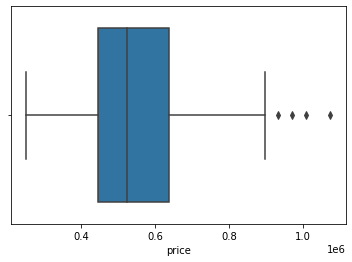

In [17]:
sns.boxplot(x=df_Wedgwood.price)

In [46]:
df_Wedgwood.view.value_counts()

0    128
2      4
1      1
Name: view, dtype: int64

In [42]:
df_Whittier_Heights.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
count,1.570000e+02,157.000000,157.000000,157.000000,157.000000,157.000000,157.0,157.0,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000
mean,5.671366e+05,3.121019,1.843949,1654.649682,3960.726115,1.372611,0.0,0.0,3.630573,7.191083,1254.522293,400.127389,1937.687898,127.414013,1429.108280,4239.547771
std,1.389197e+05,1.008619,0.709603,590.174386,1200.666645,0.399938,0.0,0.0,0.709700,0.671143,416.781696,371.405831,30.422843,490.096747,198.566581,935.820232
min,2.800000e+05,1.000000,0.750000,520.000000,1186.000000,1.000000,0.0,0.0,2.000000,6.000000,520.000000,0.000000,1900.000000,0.000000,980.000000,1349.000000
25%,4.700000e+05,2.000000,1.000000,1250.000000,3031.000000,1.000000,0.0,0.0,3.000000,7.000000,940.000000,0.000000,1918.000000,0.000000,1300.000000,3840.000000
50%,5.400000e+05,3.000000,1.750000,1560.000000,3975.000000,1.500000,0.0,0.0,4.000000,7.000000,1170.000000,360.000000,1929.000000,0.000000,1430.000000,4240.000000
75%,6.349500e+05,4.000000,2.250000,1970.000000,5000.000000,1.500000,0.0,0.0,4.000000,8.000000,1450.000000,720.000000,1946.000000,0.000000,1570.000000,5000.000000
max,1.010000e+06,7.000000,3.750000,3500.000000,6985.000000,3.000000,0.0,0.0,5.000000,9.000000,3030.000000,1370.000000,2015.000000,2015.000000,2170.000000,6470.000000


<AxesSubplot:xlabel='price'>

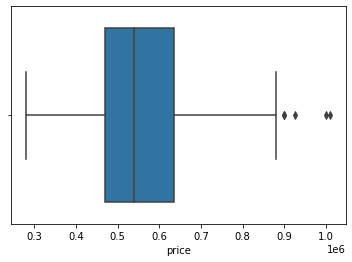

In [43]:
sns.boxplot(x=df_Whittier_Heights.price)

In [45]:
df_Whittier_Heights.view.value_counts()

0    157
Name: view, dtype: int64

In [47]:
df_Highland_Park.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
count,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.0,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000
mean,301907.467626,3.064748,1.643885,1414.539568,5429.791367,1.251799,0.0,0.093525,3.302158,6.575540,1097.345324,317.194245,1955.057554,128.669065,1306.489209,4934.920863
std,83929.751047,1.022987,0.709650,564.396051,2401.520990,0.418651,0.0,0.448703,0.666536,0.751601,361.079555,371.563537,28.193115,490.807843,309.899712,1883.555246
min,90000.000000,1.000000,0.750000,500.000000,649.000000,1.000000,0.0,0.000000,1.000000,4.000000,500.000000,0.000000,1910.000000,0.000000,780.000000,810.000000
25%,249000.000000,2.000000,1.000000,985.000000,4005.000000,1.000000,0.0,0.000000,3.000000,6.000000,865.000000,0.000000,1931.000000,0.000000,1065.000000,4000.000000
50%,300000.000000,3.000000,1.500000,1300.000000,5120.000000,1.000000,0.0,0.000000,3.000000,7.000000,1070.000000,220.000000,1948.000000,0.000000,1260.000000,5080.000000
75%,356000.000000,4.000000,2.000000,1725.000000,7258.000000,1.500000,0.0,0.000000,3.500000,7.000000,1210.000000,540.000000,1973.000000,0.000000,1470.000000,6175.000000
max,560000.000000,6.000000,4.000000,3120.000000,15240.000000,3.000000,0.0,3.000000,5.000000,9.000000,2800.000000,1550.000000,2011.000000,2013.000000,2190.000000,8280.000000


In [48]:
df_Highland_Park.view.value_counts()

0    133
2      5
3      1
Name: view, dtype: int64

In [61]:
# A coluna view contém uma quantidade de zeros muito grande, o que aparentemente está incorreto, 
#considerando que tais dataframes contém imóveis de alto valores
# A coluna waterfront não é utilizada nos bairros selecionados, portanto será deletada

In [51]:
df_Wedgwood.drop('view', axis=1, inplace=True)
df_Whittier_Heights.drop('view', axis=1, inplace=True)
df_Highland_Park.drop('view', axis=1, inplace=True)

/usr/local/lib/python3.9/dist-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [52]:
df_Wedgwood.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15,neighborhood,city
0,2014-05-27,468000.0,2,1.00,1160,6000,1.0,0,4,7,860,300,1942,0,1330,6000,Wedgwood,Seattle
1,2014-06-24,438000.0,3,1.75,1520,6380,1.0,0,3,7,790,730,1948,0,1520,6235,Wedgwood,Seattle
6,2014-05-16,350000.0,1,1.00,700,5100,1.0,0,3,7,700,0,1942,0,1010,5100,Wedgwood,Seattle
9,2014-08-14,415000.0,2,1.00,1070,4500,1.0,0,3,7,1070,0,1937,0,1320,4465,Wedgwood,Seattle
11,2014-09-01,438924.0,3,1.50,1050,4590,1.0,0,3,7,850,200,1949,0,1770,5400,Wedgwood,Seattle


In [57]:
df_Whittier_Heights.drop('waterfront', axis=1, inplace=True)

/usr/local/lib/python3.9/dist-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [58]:
df_Whittier_Heights.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15,neighborhood,city
2,2014-06-24,687500.0,4,1.75,2330,5000,1.5,4,7,1510,820,1929,0,1460,5000,Whittier Heights,Seattle
3,2014-11-10,535000.0,3,1.00,1090,3000,1.5,4,8,1090,0,1929,0,1570,5080,Whittier Heights,Seattle
4,2014-10-27,555000.0,3,2.00,1980,3478,1.5,4,7,1440,540,1929,0,1610,3478,Whittier Heights,Seattle
5,2014-05-23,460000.0,3,1.00,1670,4005,1.5,4,7,1170,500,1939,0,1240,4005,Whittier Heights,Seattle
13,2015-02-25,605000.0,2,1.75,1760,5000,1.0,4,7,940,820,1927,0,1530,5000,Whittier Heights,Seattle


In [59]:
df_Highland_Park.drop('waterfront', axis=1, inplace=True)

/usr/local/lib/python3.9/dist-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [60]:
df_Highland_Park.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15,neighborhood,city
7,2015-02-26,181000.0,2,1.50,720,5120,1.0,3,6,720,0,1954,0,1150,2566,Highland Park,Seattle
8,2014-10-20,385000.0,4,1.75,2360,7620,1.0,4,7,1180,1180,1955,0,1910,7620,Highland Park,Seattle
10,2014-12-10,345000.0,4,1.00,1550,7620,1.5,3,7,1550,0,1957,0,1450,7620,Highland Park,Seattle
12,2015-03-19,259950.0,2,2.00,1070,649,2.0,3,9,720,350,2008,0,1070,928,Highland Park,Seattle
15,2014-08-11,209000.0,3,2.00,1230,1340,2.0,3,7,1020,210,2003,0,1260,1312,Highland Park,Seattle


***
## Análise Para Wedgwood
***

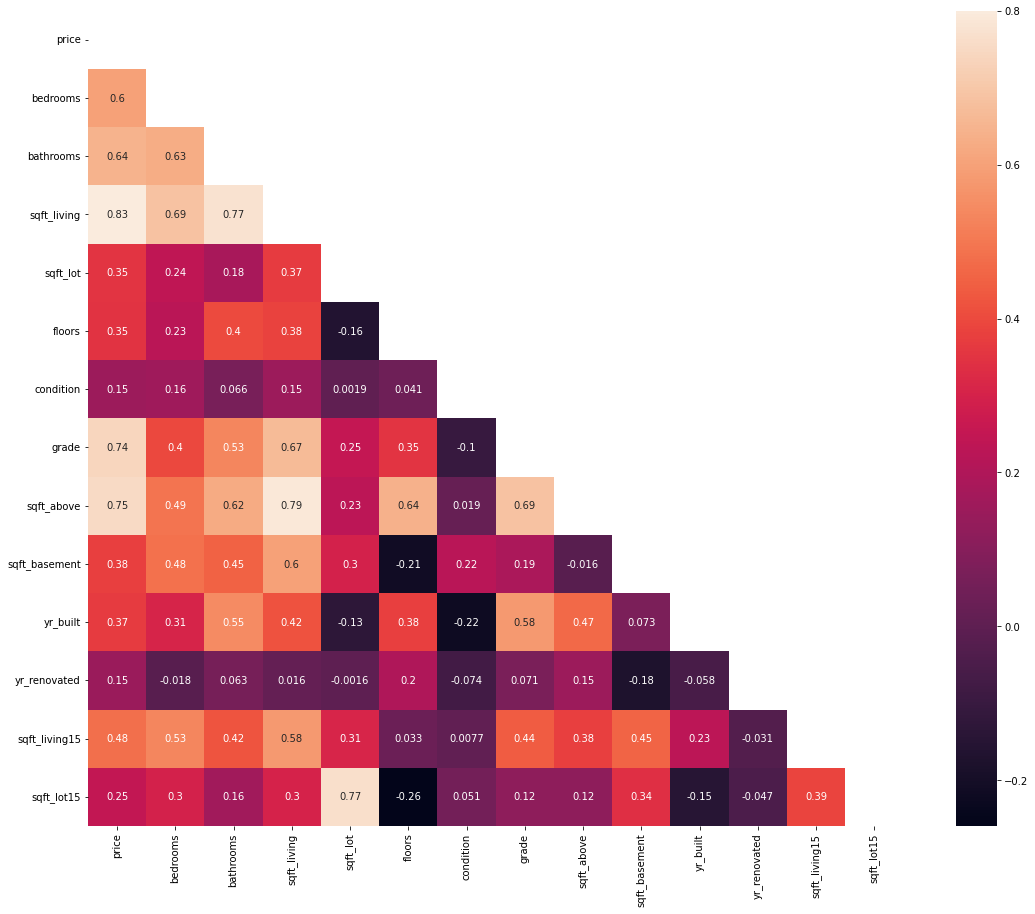

In [62]:
matrix = df_Wedgwood.corr() 
fig = plt.figure(figsize = (19, 15))
mask = np.triu(np.ones_like(matrix, dtype=bool))
sns.heatmap(matrix, vmax = 0.8,mask=mask, square = True, annot = True)
plt.show()

In [63]:
# A partir da matriz de correlação, percebe-se que os principais fatores que influenciam no preço são:
#   Qualidade do material utilizado na obra e no design (grade)
#   Área utilizada acima do porão (sqft_above)
#   Área útil (sqft_living) 

In [64]:
df_Wedgwood.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'condition', 'grade', 'sqft_above', 'sqft_basement',
       'yr_built', 'yr_renovated', 'sqft_living15', 'sqft_lot15',
       'neighborhood', 'city'],
      dtype='object')

In [68]:
dist_columns = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'condition', 'grade', 'sqft_above', 'sqft_basement',
       'yr_built', 'yr_renovated', 'sqft_living15', 'sqft_lot15']

array([[<AxesSubplot:title={'center':'bedrooms'}>,
        <AxesSubplot:title={'center':'bathrooms'}>,
        <AxesSubplot:title={'center':'sqft_living'}>,
        <AxesSubplot:title={'center':'sqft_lot'}>],
       [<AxesSubplot:title={'center':'floors'}>,
        <AxesSubplot:title={'center':'condition'}>,
        <AxesSubplot:title={'center':'grade'}>,
        <AxesSubplot:title={'center':'sqft_above'}>],
       [<AxesSubplot:title={'center':'sqft_basement'}>,
        <AxesSubplot:title={'center':'yr_built'}>,
        <AxesSubplot:title={'center':'yr_renovated'}>,
        <AxesSubplot:title={'center':'sqft_living15'}>],
       [<AxesSubplot:title={'center':'sqft_lot15'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

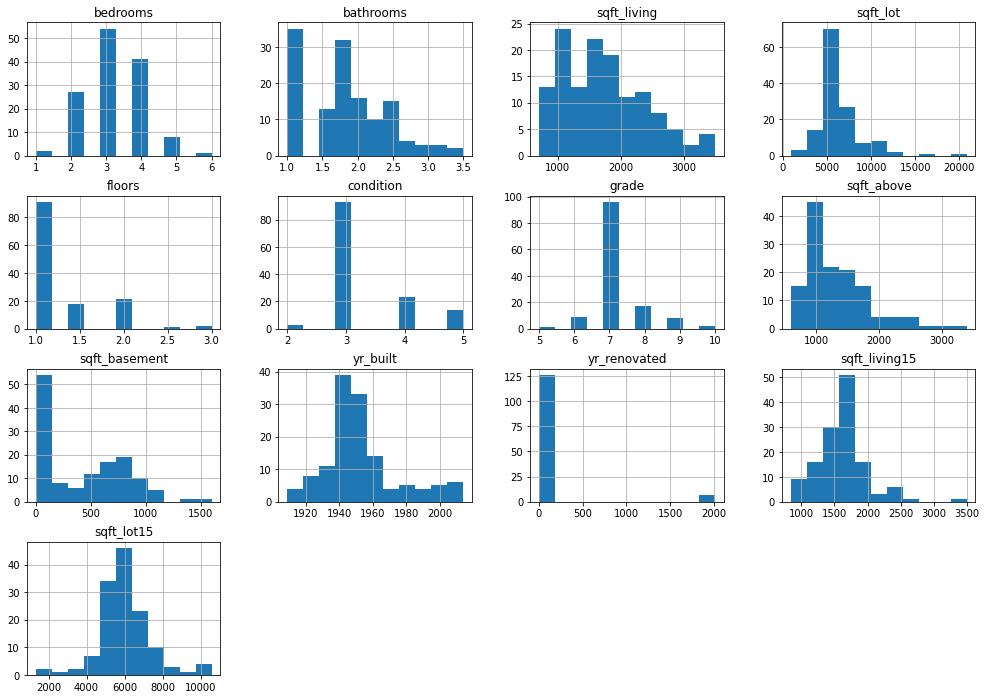

In [69]:
df_Wedgwood[dist_columns].hist(figsize=(17, 12), bins=11)

In [ ]:
# As vendas, de modo geral, possuem: 
#     - de 2 a 4 quartos
#     - de 1 a 2,5 banheiros
#     - Até 2 andares
#     - condição 3
#     - qualidade da construção de 7 
#     - Área útil de até 2500 ft²

In [73]:
grupo_quartos = df_Wedgwood.groupby('bedrooms').mean()
grupo_quartos.reset_index(inplace=True)
grupo_quartos

,bedrooms,price,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
0,1,363500.000000,1.000000,825.000000,7842.500000,1.250000,3.000000,6.500000,825.000000,0.000000,1935.500000,0.000000,1205.000000,6078.000000
1,2,432407.407407,1.240741,1141.111111,5623.148148,1.074074,3.185185,6.777778,988.518519,152.592593,1942.814815,221.333333,1397.037037,5516.407407
2,3,531914.333333,1.708333,1618.555556,6112.648148,1.259259,3.370370,7.185185,1225.592593,392.962963,1952.092593,73.333333,1576.796296,5902.185185
3,4,635562.195122,2.134146,2119.414634,6258.951220,1.365854,3.414634,7.414634,1597.658537,521.756098,1959.219512,0.000000,1752.195122,6116.341463
4,5,768350.000000,2.687500,2596.250000,9025.125000,1.500000,3.750000,7.875000,1758.750000,837.500000,1962.625000,502.625000,1958.750000,7219.750000
5,6,779000.000000,2.500000,3250.000000,12000.000000,1.000000,3.000000,8.000000,1800.000000,1450.000000,1966.000000,0.000000,3490.000000,10320.000000


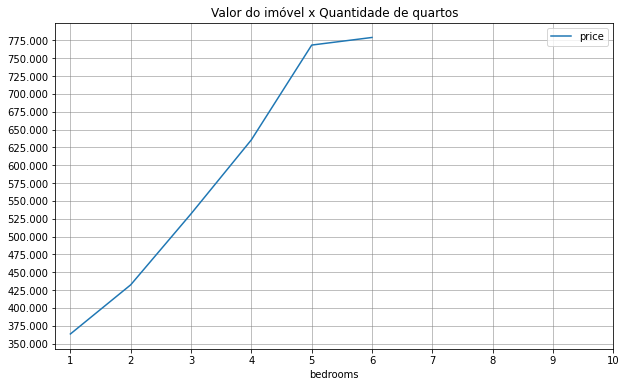

In [79]:
ax = grupo_quartos.plot(kind='line', x ='bedrooms', y='price', figsize=(10, 6))

ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x).replace(',', '.')))
ax.set_title('Valor do imóvel x Quantidade de quartos')

yticks = range(350000, 800000, 25000)
xticks= range(1, 11, 1)
ax.set_yticks(yticks)
ax.set_xticks(xticks)

ax.grid(True, linestyle='-', linewidth=0.5, color='gray')

In [80]:
# variação % de preço para o aumento de 1 quarto para 2
(grupo_quartos.price.pct_change()[1] * 100).round(2) 

18.96

In [81]:
# variação % de preço para o aumento de 2 quarto para 3
(grupo_quartos.price.pct_change()[2] * 100).round(2)

23.01

In [82]:
# variação % de preço para o aumento de 3 quarto para 4
(grupo_quartos.price.pct_change()[3] * 100).round(2)

19.49

In [83]:
# variação % de preço para o aumento de 1 quarto para 3
(grupo_quartos.price.pct_change(periods=2)[2] * 100).round(2)

46.33

In [84]:
# variação % de preço para o aumento de 2 quarto para 4
(grupo_quartos.price.pct_change(periods=2)[3] * 100).round(2)

46.98

In [88]:
grupo_banheiros = df_Wedgwood.groupby('bathrooms').mean()
grupo_banheiros.reset_index(inplace=True)

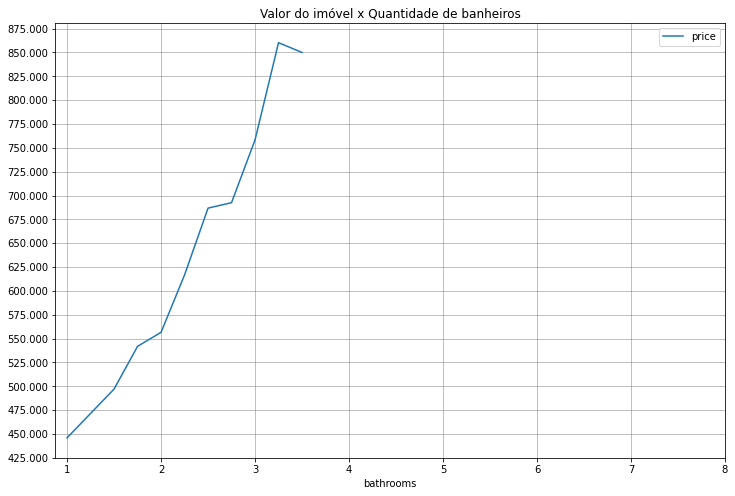

In [93]:
ax = grupo_banheiros.plot(kind='line', x ='bathrooms', y='price', figsize=(12, 8))
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x).replace(',', '.')))
ax.set_title('Valor do imóvel x Quantidade de banheiros')
yticks = range(425000, 900000, 25000)
xticks= range(1, 9, 1)
ax.set_yticks(yticks)
ax.set_xticks(xticks)
ax.grid(True, linestyle='-', linewidth=0.5, color='gray')

In [94]:
# variação % de preço para o aumento de 1 banheiro para 2
(grupo_banheiros.price.pct_change()[1] * 100).round(2)

11.46

In [99]:
x_ponto_0 = 2
y_ponto_0 = np.interp(x_ponto_0, grupo_banheiros['bathrooms'], grupo_banheiros['price'])
y_ponto_0

556548.125

In [98]:
x_ponto = 2.5
y_ponto = np.interp(x_ponto, grupo_banheiros['bathrooms'], grupo_banheiros['price'])
y_ponto

686800.0

In [100]:
# variação % de preço para o aumento de 2 banheiro para 2.5
var_percent = (x_ponto - x_ponto_0) * 100 / x_ponto_0
var_percent

25.0

In [102]:
grupo_andares = df_Wedgwood.groupby('floors').mean()
grupo_andares.reset_index(inplace=True)

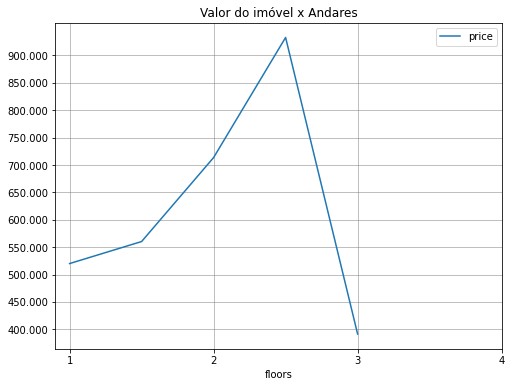

In [104]:
ax = grupo_andares.plot(kind='line', x ='floors', y='price', figsize=(8, 6))
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x).replace(',', '.')))
ax.set_title('Valor do imóvel x Andares')
yticks = range(400000, 950000, 50000)
xticks= range(1, 5, 1)
ax.set_yticks(yticks)
ax.set_xticks(xticks)
ax.grid(True, linestyle='-', linewidth=0.5, color='gray')

In [105]:
# variação % de preço para o aumento de 1 andar para 2
(grupo_andares.price.pct_change()[1] * 100).round(2)

7.73

In [106]:
grupo_condicao = df_Wedgwood.groupby('condition').mean()
grupo_condicao.reset_index(inplace=True)

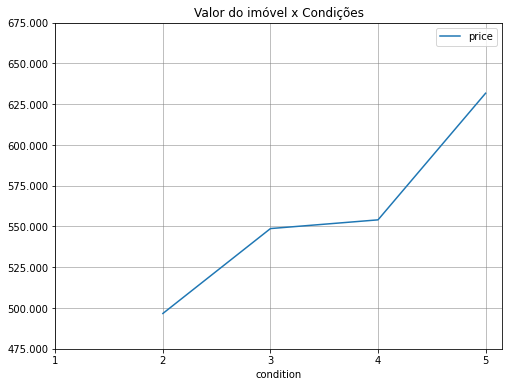

In [108]:
ax = grupo_condicao.plot(kind='line', x ='condition', y='price', figsize=(8, 6))
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x).replace(',', '.')))
ax.set_title('Valor do imóvel x Condições')
yticks = range(475000, 700000, 25000)
xticks= range(1, 6, 1)
ax.set_yticks(yticks)
ax.set_xticks(xticks)
ax.grid(True, linestyle='-', linewidth=0.5, color='gray')

In [109]:
# variação % de preço para uma reforma de condições
(grupo_andares.price.pct_change()[2] * 100).round(2)

27.36

In [110]:
# variação % de preço para uma reforma de condições
(grupo_andares.price.pct_change(periods=2)[3] * 100).round(2)

66.5

In [111]:
grupo_material = df_Wedgwood.groupby('grade').mean()
grupo_material.reset_index(inplace=True)

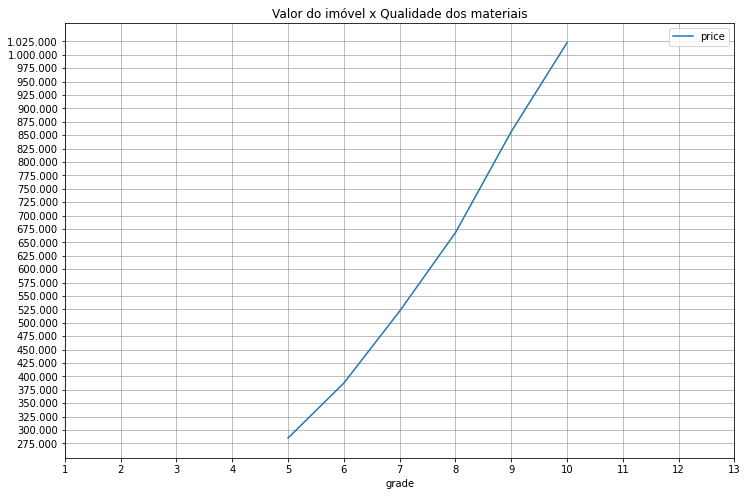

In [113]:
ax = grupo_material.plot(kind='line', x ='grade', y='price', figsize=(12, 8))
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x).replace(',', '.')))
ax.set_title('Valor do imóvel x Qualidade dos materiais')
yticks = range(275000, 1050000, 25000)
xticks= range(1, 14, 1)
ax.set_yticks(yticks)
ax.set_xticks(xticks)
ax.grid(True, linestyle='-', linewidth=0.5, color='gray')

In [115]:
# variação % de preço para qualidade dos materiais de 5 para 7
(grupo_material.price.pct_change(periods=2)[2] * 100).round(2)

83.06

In [117]:
# variação % de preço para qualidade dos materiais de 6 para 7
(grupo_material.price.pct_change()[2] * 100).round(2)

34.66

####A partir desta análise, podemos notar que, no bairro WedgWood o ideal para vender seria imóveis que possuem de 2 a 4 quartos, de 1 banheiros até 2.5, até 2 andares, com condição 3 e qualidade da construção de 7, deste modo, os imóveis chamariam mais atenção e facilitariam as vendas.Para otimizar os lucros, o ideal seria realizar algumas reformas nos imóveis, sendo elas:


*   Com uma casa de 1 quartos, construir mais 1 ou dois poderiam valorizar o imóvel entre 18% e 46%;
*   Imóvel com 2 quartos, construir mais 1 ou 2 iria aumentar o valor em 19% a 23%;

*   A construção de um banheiro com toilet e pia numa casa com 2 banheiros poderia valorizá-la em 25%
* A construção de mais um andar em um imóvel de um único andar, iria valorizar em quse 8%;

*   Uma reforma elevando os níveis de condições para 3 ou 4, valorizaria o imóvel entre 33% e 66%;

Um outro ponto importante, deve-se ao fato de que ao aumentar a área utilizada de um imóvel, irá ter uma forte influência no valor do imóvel. 